<a href="https://colab.research.google.com/github/dhyannn/ML_project/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import time
import threading
import plotly.express as px

In [21]:
water=pd.read_csv('/content/water_potability.csv')

In [22]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [23]:
water['Potability'].unique()

array([0, 1])

In [24]:
water.shape

(3276, 10)

In [25]:
water.isna()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3271,False,False,False,False,False,False,False,False,False,False
3272,False,False,False,False,True,False,False,True,False,False
3273,False,False,False,False,True,False,False,False,False,False
3274,False,False,False,False,True,False,False,False,False,False


In [26]:
water.fillna(water.mean(), inplace=True)

In [27]:
water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [28]:
count= water['Potability'].value_counts()
count

0    1998
1    1278
Name: Potability, dtype: int64

In [37]:
water.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [39]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [70]:
corr_matrix['Sulfate'].sort_values(ascending=False)


Sulfate            1.000000
Organic_carbon     0.026909
Chloramines        0.023791
ph                 0.014403
Turbidity         -0.009790
Conductivity      -0.014059
Potability        -0.020619
Trihalomethanes   -0.025605
Hardness          -0.092766
Solids            -0.149840
Name: Sulfate, dtype: float64

In [68]:
corr_matrix['Conductivity'].sort_values(ascending=False)

Conductivity       1.000000
Organic_carbon     0.020966
ph                 0.017192
Solids             0.013831
Turbidity          0.005798
Trihalomethanes    0.001255
Potability        -0.008128
Sulfate           -0.014059
Chloramines       -0.020486
Hardness          -0.023915
Name: Conductivity, dtype: float64

In [67]:
corr_matrix['Solids'].sort_values(ascending=False)


Solids             1.000000
Potability         0.033743
Turbidity          0.019546
Conductivity       0.013831
Organic_carbon     0.010242
Trihalomethanes   -0.008875
Hardness          -0.046899
Chloramines       -0.070148
ph                -0.081884
Sulfate           -0.149840
Name: Solids, dtype: float64

In [60]:
corr_matrix=water.corr()
corr_matrix['Organic_carbon'].sort_values(ascending=False)


Organic_carbon     1.000000
ph                 0.040061
Sulfate            0.026909
Conductivity       0.020966
Solids             0.010242
Hardness           0.003610
Chloramines       -0.012653
Trihalomethanes   -0.012976
Turbidity         -0.027308
Potability        -0.030001
Name: Organic_carbon, dtype: float64

pH and Organic Carbon are also related

In [62]:
corr_matrix['ph'].sort_values(ascending=False)

ph                 1.000000
Hardness           0.075833
Organic_carbon     0.040061
Conductivity       0.017192
Sulfate            0.014403
Trihalomethanes    0.002994
Potability        -0.003287
Chloramines       -0.031811
Turbidity         -0.036222
Solids            -0.081884
Name: ph, dtype: float64

In [66]:
corr_matrix['Hardness'].sort_values(ascending=False)


Hardness           1.000000
ph                 0.075833
Organic_carbon     0.003610
Trihalomethanes   -0.012690
Potability        -0.013837
Turbidity         -0.014449
Conductivity      -0.023915
Chloramines       -0.030054
Solids            -0.046899
Sulfate           -0.092766
Name: Hardness, dtype: float64

pH and Hardness are the most correlated columns.

In [64]:
corr_matrix['Chloramines'].sort_values(ascending=False)


Chloramines        1.000000
Sulfate            0.023791
Potability         0.023779
Trihalomethanes    0.016627
Turbidity          0.002363
Organic_carbon    -0.012653
Conductivity      -0.020486
Hardness          -0.030054
ph                -0.031811
Solids            -0.070148
Name: Chloramines, dtype: float64

In [65]:
corr_matrix['Trihalomethanes'].sort_values(ascending=False)

Trihalomethanes    1.000000
Chloramines        0.016627
Potability         0.006960
ph                 0.002994
Conductivity       0.001255
Solids            -0.008875
Hardness          -0.012690
Organic_carbon    -0.012976
Turbidity         -0.021502
Sulfate           -0.025605
Name: Trihalomethanes, dtype: float64

In [69]:
corr_matrix['Turbidity'].sort_values(ascending=False)

Turbidity          1.000000
Solids             0.019546
Conductivity       0.005798
Chloramines        0.002363
Potability         0.001581
Sulfate           -0.009790
Hardness          -0.014449
Trihalomethanes   -0.021502
Organic_carbon    -0.027308
ph                -0.036222
Name: Turbidity, dtype: float64

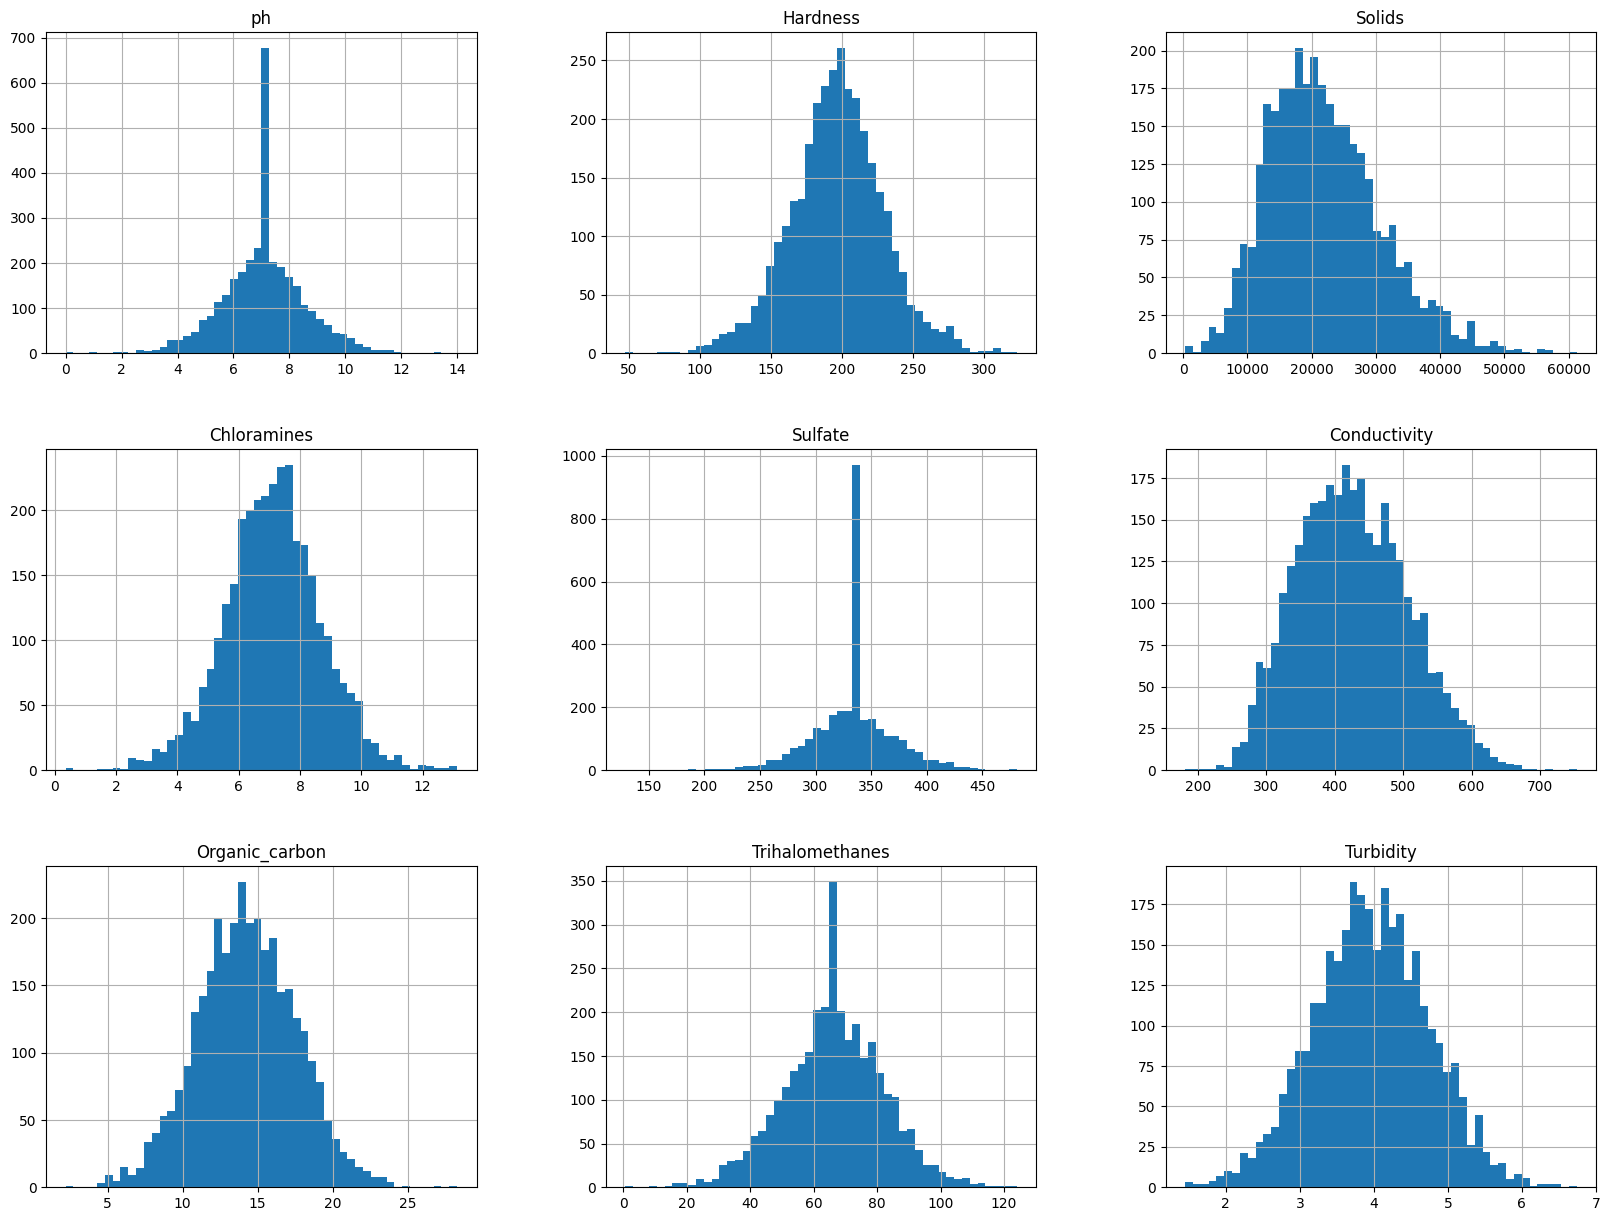

In [54]:
num_col1=water.drop(columns='Potability')
num_col1.hist(bins=50, figsize=(20,15))
plt.show()

In [42]:
num_col=['ph','Hardness',	'Solids'	,'Chloramines',	'Sulfate'	,'Conductivity',	'Organic_carbon',	'Trihalomethanes',	'Turbidity']
categorical_col=['Potability']

[[<Axes: xlabel='ph', ylabel='ph'> <Axes: xlabel='Hardness', ylabel='ph'>
  <Axes: xlabel='Solids', ylabel='ph'>
  <Axes: xlabel='Chloramines', ylabel='ph'>
  <Axes: xlabel='Sulfate', ylabel='ph'>
  <Axes: xlabel='Conductivity', ylabel='ph'>
  <Axes: xlabel='Organic_carbon', ylabel='ph'>
  <Axes: xlabel='Trihalomethanes', ylabel='ph'>
  <Axes: xlabel='Turbidity', ylabel='ph'>]
 [<Axes: xlabel='ph', ylabel='Hardness'>
  <Axes: xlabel='Hardness', ylabel='Hardness'>
  <Axes: xlabel='Solids', ylabel='Hardness'>
  <Axes: xlabel='Chloramines', ylabel='Hardness'>
  <Axes: xlabel='Sulfate', ylabel='Hardness'>
  <Axes: xlabel='Conductivity', ylabel='Hardness'>
  <Axes: xlabel='Organic_carbon', ylabel='Hardness'>
  <Axes: xlabel='Trihalomethanes', ylabel='Hardness'>
  <Axes: xlabel='Turbidity', ylabel='Hardness'>]
 [<Axes: xlabel='ph', ylabel='Solids'>
  <Axes: xlabel='Hardness', ylabel='Solids'>
  <Axes: xlabel='Solids', ylabel='Solids'>
  <Axes: xlabel='Chloramines', ylabel='Solids'>
  <Axes: 

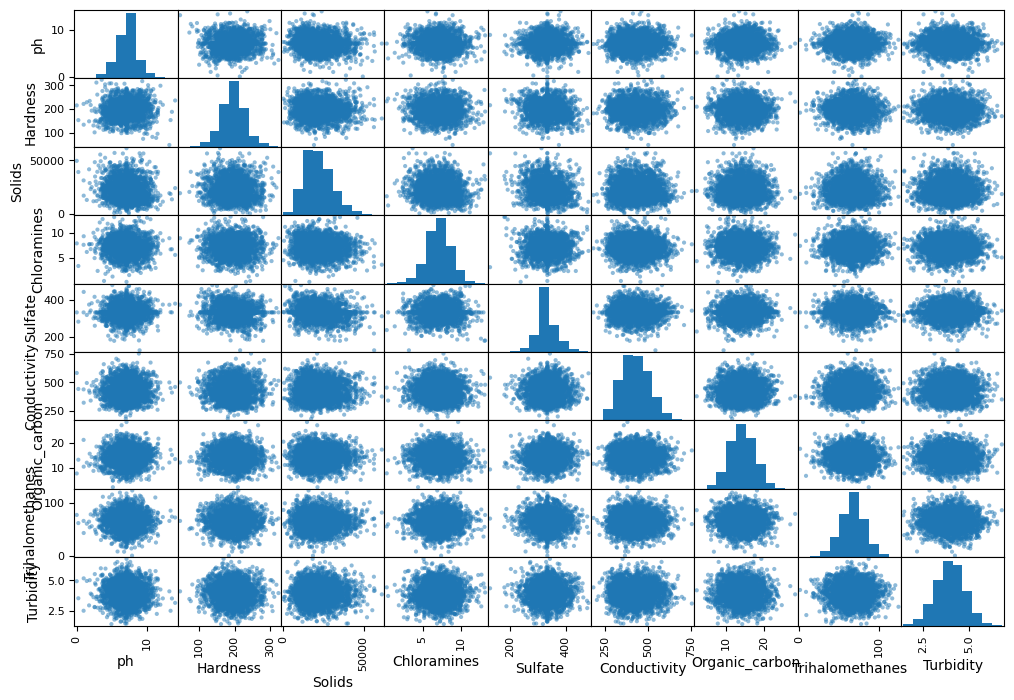

In [53]:
from pandas.plotting import scatter_matrix
print (scatter_matrix(water[num_col],figsize=(12,8)))

Text(0.5, 1.0, 'percentage of potability')

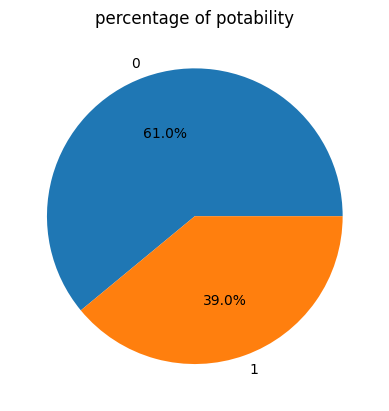

In [29]:
plt.pie(count,labels=count.index,autopct='%1.1f%%')
plt.title('percentage of potability')
#0-not potable
#1-potable

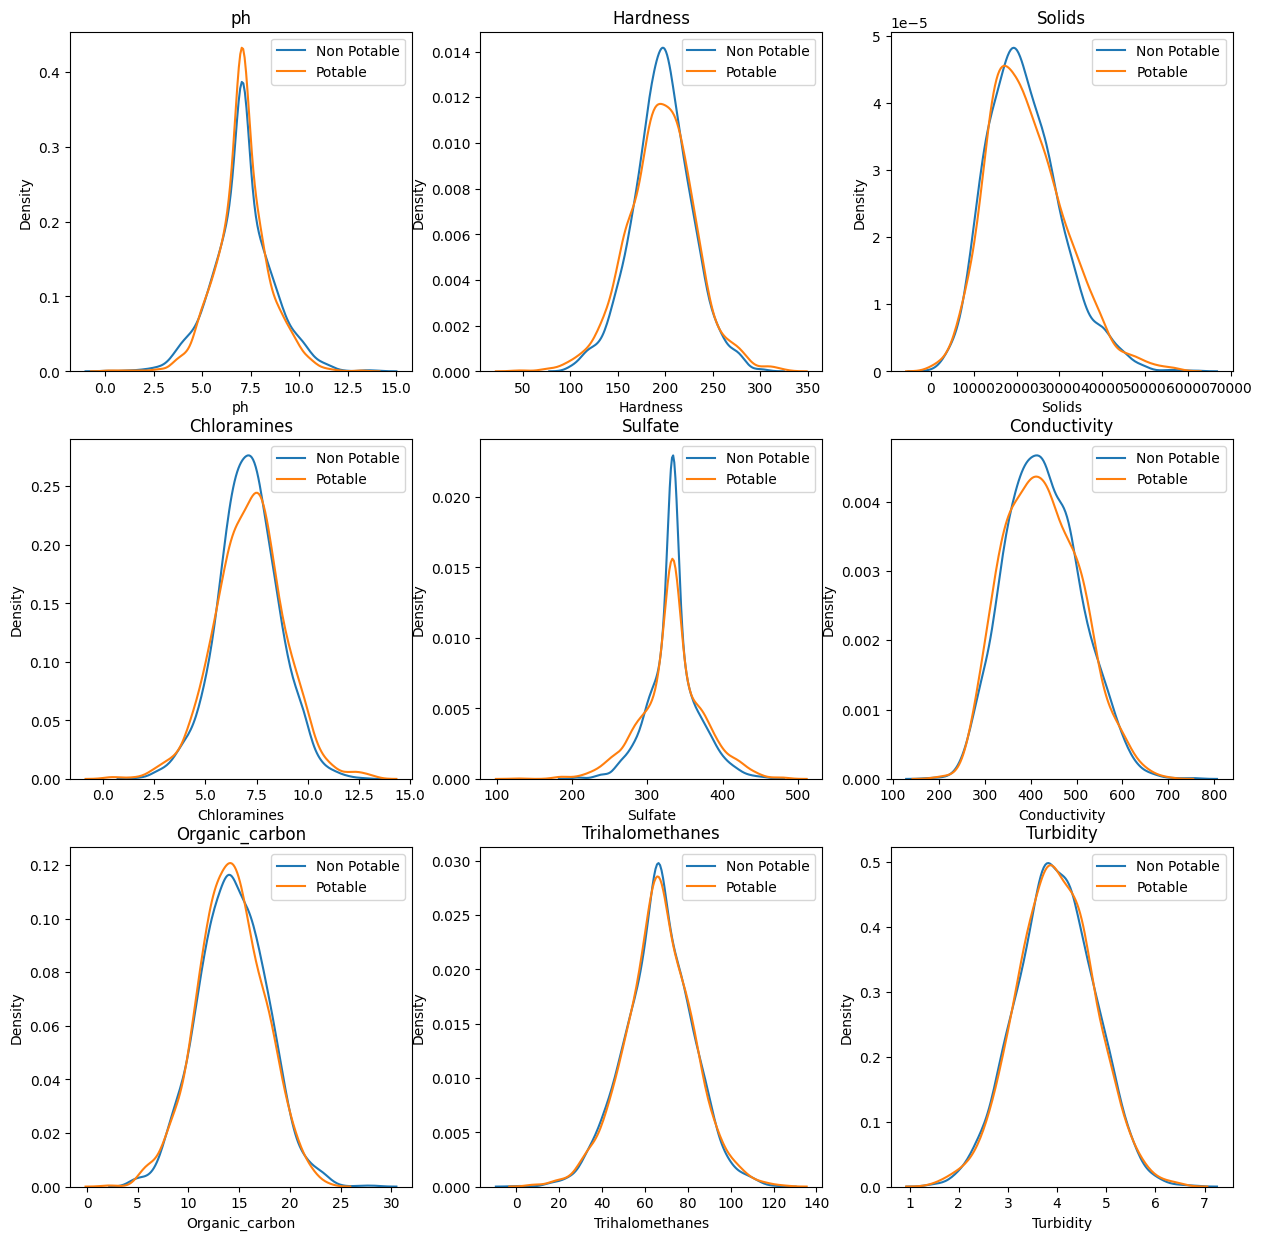

In [30]:
non_potable = water.query("Potability == 0")
potable = water.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(water.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend()
plt.show()

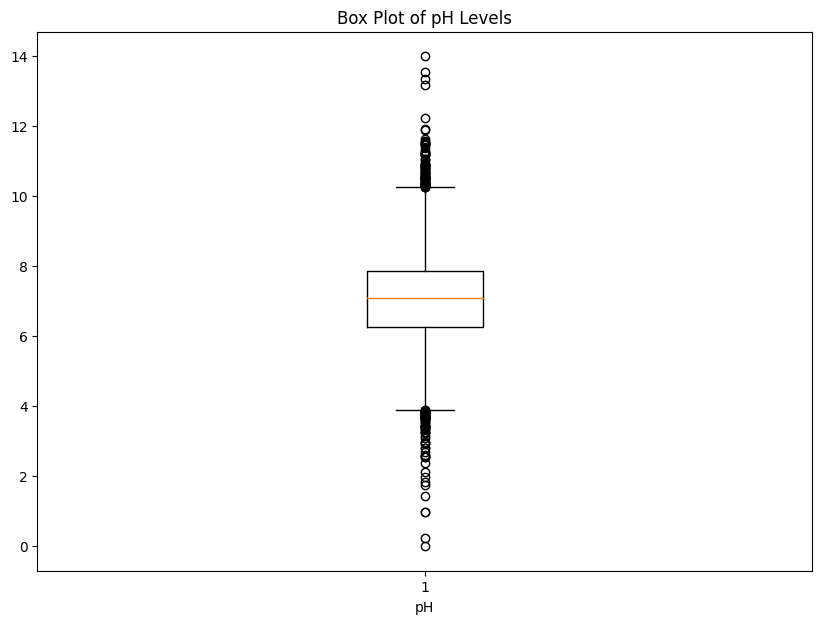

In [31]:
plt.figure(figsize=(10, 7))
plt.boxplot(water['ph'])
plt.title('Box Plot of pH Levels')
plt.xlabel('pH')
plt.show()

In [32]:
fig = px.box(water, x="Potability", y="ph", color="Potability", width=800, height=400)
fig.show()